In [2]:
import pandas as pd

## Testing

In [5]:
df = pd.read_csv("players.csv")

In [8]:
df.head()

,id,name,now_cost,position,team,chance_of_playing_next_round,expected_goals_per_90,creativity,event_points,news,...,saves,starts_per_90,bps,value_form,expected_goals_conceded_per_90,red_cards,corners_and_indirect_freekicks_order,ep_this,cost_efficiency_total_points,cost_efficiency_ppg
0,1,Fábio Ferreira Vieira,5.4,MID,Arsenal,0.0,0.00,0.0,0,Has joined Portuguese side FC Porto on loan fo...,...,0,0.00,0,0.0,0.00,0,NaN,0.0,0.000000,0.000000
1,2,Gabriel Fernando de Jesus,6.8,FWD,Arsenal,100.0,0.50,36.2,1,NaN,...,0,0.74,28,0.1,1.02,0,NaN,1.3,0.882353,0.102941
2,3,Gabriel dos Santos Magalhães,6.1,DEF,Arsenal,100.0,0.14,64.7,2,NaN,...,0,1.04,166,0.2,1.08,0,NaN,2.0,7.377049,0.672131
3,4,Kai Havertz,8.0,FWD,Arsenal,100.0,0.41,137.4,1,NaN,...,0,1.00,169,0.2,1.08,0,NaN,1.5,5.750000,0.525000
4,5,Karl Hein,4.0,GKP,Arsenal,0.0,0.00,0.0,0,Loaned to Real Valladolid,...,0,0.00,0,0.0,0.00,0,NaN,0.0,0.000000,0.000000


In [7]:
# Ensure relevant columns are numeric and prepare cost column
data['now_cost'] = pd.to_numeric(data['now_cost'], errors='coerce') / 10  # Convert cost to millions
data['total_points'] = pd.to_numeric(data['total_points'], errors='coerce')
data['points_per_game'] = pd.to_numeric(data['points_per_game'], errors='coerce')

# Calculate cost efficiency metrics
data['cost_efficiency_total_points'] = data['total_points'] / data['now_cost']
data['cost_efficiency_ppg'] = data['points_per_game'] / data['now_cost']

# Drop rows with missing or invalid data
data = data.dropna(subset=['cost_efficiency_total_points', 'cost_efficiency_ppg'])

# Calculate z-scores to identify outliers
data['z_cost_efficiency_total_points'] = zscore(data['cost_efficiency_total_points'])
data['z_cost_efficiency_ppg'] = zscore(data['cost_efficiency_ppg'])

# Define outliers (z-score > 2 or < -2)
outliers_total_points = data[data['z_cost_efficiency_total_points'].abs() > 2]
outliers_ppg = data[data['z_cost_efficiency_ppg'].abs() > 2]

# Sort the data by position
sorted_data = data.sort_values(by='position')

# Display results
print("Sorted Data by Position:")
display(sorted_data[['web_name', 'position', 'now_cost', 'total_points', 'cost_efficiency_total_points', 'cost_efficiency_ppg']])

print("\nOutliers Based on Total Points Efficiency:")
display(outliers_total_points[['web_name', 'position', 'now_cost', 'total_points', 'cost_efficiency_total_points']])

print("\nOutliers Based on Points per Game Efficiency:")
display(outliers_ppg[['web_name', 'position', 'now_cost', 'points_per_game', 'cost_efficiency_ppg']])


Sorted Data by Position:


,web_name,position,now_cost,total_points,cost_efficiency_total_points,cost_efficiency_ppg
677,Pond,DEF,0.39,0,0.000000,0.000000
189,Cucurella,DEF,0.50,18,36.000000,3.600000
193,Disasi,DEF,0.43,7,16.279070,8.139535
477,Burn,DEF,0.44,27,61.363636,5.681818
475,Botman,DEF,0.44,0,0.000000,0.000000
...,...,...,...,...,...,...
448,Hannibal,MID,0.45,0,0.000000,0.000000
447,Garnacho,MID,0.64,40,62.500000,5.625000
226,Ebiowei,MID,0.45,0,0.000000,0.000000
203,Madueke,MID,0.64,49,76.562500,7.656250



Outliers Based on Total Points Efficiency:


,web_name,position,now_cost,total_points,cost_efficiency_total_points
59,Rogers,MID,0.54,45,83.333333
88,Semenyo,MID,0.57,46,80.701754
103,Damsgaard,MID,0.50,40,80.000000
113,Mbeumo,MID,0.79,76,96.202532
124,Wissa,FWD,0.61,54,88.524590
168,Welbeck,FWD,0.59,64,108.474576
211,Sánchez,GKP,0.47,44,93.617021
228,Guéhi,DEF,0.45,37,82.222222
229,Henderson,GKP,0.44,36,81.818182
267,McNeil,MID,0.57,51,89.473684



Outliers Based on Points per Game Efficiency:


,web_name,position,now_cost,points_per_game,cost_efficiency_ppg
113,Mbeumo,MID,0.79,6.9,8.734177
124,Wissa,FWD,0.61,6.8,11.147541
149,João Pedro,FWD,0.54,6.0,11.111111
162,Steele,GKP,0.43,4.5,10.465116
168,Welbeck,FWD,0.59,5.8,9.830508
176,O'Riley,MID,0.55,8.0,14.545455
211,Sánchez,GKP,0.47,4.0,8.510638
220,Chalobah,DEF,0.44,4.0,9.090909
267,McNeil,MID,0.57,5.1,8.947368
271,Pickford,GKP,0.49,4.2,8.571429


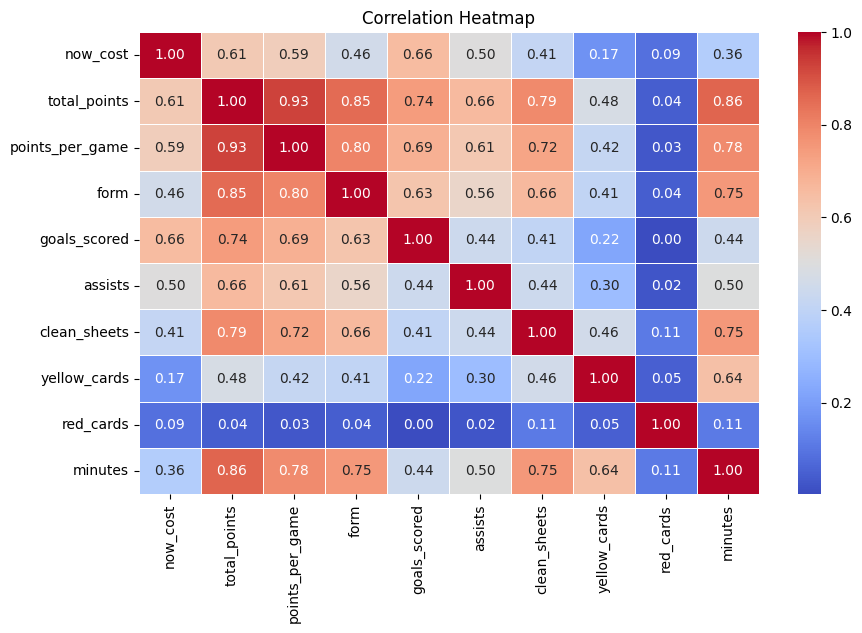

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns for correlation analysis
numeric_columns = ['now_cost', 'total_points', 'points_per_game', 'form', 'goals_scored', 'assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'minutes']

# Calculate correlation matrix
corr = data[numeric_columns].corr()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and display the plot
plt.title('Correlation Heatmap')
plt.show()


In [17]:
# Filter data for a specific player (e.g., 'Gabriel Jesus')
player_name = 'Gabriel Fernando de Jesus'
player_data = data[data['web_name'] == player_name]

# Ensure the data is sorted by gameweek or date
player_data_sorted = player_data.sort_values(by='gameweek')  # Replace 'gameweek' with actual time column if needed

# Plot form and transfers over time
plt.figure(figsize=(12, 6))

# Plot form
plt.plot(player_data_sorted['gameweek'], player_data_sorted['form'], label='Form', color='blue', marker='o')

# Plot transfers in
plt.plot(player_data_sorted['gameweek'], player_data_sorted['transfers_in'], label='Transfers In', color='green', marker='x')

# Plot transfers out
plt.plot(player_data_sorted['gameweek'], player_data_sorted['transfers_out'], label='Transfers Out', color='red', marker='x')

plt.title(f'{player_name} - Form and Transfer Activity Over Time')
plt.xlabel('Gameweek')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'gameweek'

## Data Loading and Cleaning

In [ ]:
import requests
import pandas as pd
import time

# Base URL for the FPL API
base_url = 'https://fantasy.premierleague.com/api/'

# Placeholder for all players' data
all_players_data = []

# Iterate over all player IDs (1 to 678)
for player_id in range(1, 679):  # Adjust the range if needed
    try:
        # Fetch data for the current player
        url = f"{base_url}element-summary/{player_id}/"
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        player_data = response.json()

        # Add historical data to the list
        historical = player_data.get('history', [])
        for game in historical:
            game['player_id'] = player_id  # Add player ID to each row
        all_players_data.extend(historical)

        # Optional: Print progress
        print(f"Fetched data for player ID {player_id}")

        # Rate limiting (FPL servers may rate limit you if too many requests are sent quickly)
        time.sleep(0.2)  # 200ms delay between requests

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for player ID {player_id}: {e}")
        continue

# Convert the list of historical data to a DataFrame
all_players_df = pd.DataFrame(all_players_data)

Fetched data for player ID 1
Fetched data for player ID 2
Fetched data for player ID 3
Fetched data for player ID 4
Fetched data for player ID 5
Fetched data for player ID 6
Fetched data for player ID 7
Fetched data for player ID 8
Fetched data for player ID 9
Fetched data for player ID 10
Fetched data for player ID 11
Fetched data for player ID 12
Fetched data for player ID 13
Fetched data for player ID 14
Fetched data for player ID 15
Fetched data for player ID 16
Fetched data for player ID 17
Fetched data for player ID 18
Fetched data for player ID 19
Fetched data for player ID 20
Fetched data for player ID 21
Fetched data for player ID 22
Fetched data for player ID 23
Fetched data for player ID 24
Fetched data for player ID 25
Fetched data for player ID 26
Fetched data for player ID 27
Fetched data for player ID 28
Fetched data for player ID 29
Fetched data for player ID 30
Fetched data for player ID 31
Fetched data for player ID 32
Fetched data for player ID 33
Fetched data for pl

In [21]:
#getting player names and their teams which has player id to merge with player id from historical data 
# select columns of interest from players df
# base url for all FPL API endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()

# get player data from 'elements' field
players = r['elements']

# create players dataframe
players = pd.json_normalize(r['elements'])

# show some information about first five players
players[['id', 'web_name', 'team', 'element_type']].head()

# create teams dataframe
teams = pd.json_normalize(r['teams'])

teams.head()

df = players[[
    'id', 'first_name', 'second_name', 'web_name', 'team', 'element_type']]

# get position information from 'element_types' field
positions = pd.json_normalize(r['element_types'])

positions.head()

# join team name
df = df.merge(
    teams[['id', 'name']],
    left_on='team',
    right_on='id',
    suffixes=['_player', None]
).drop(
    ['team', 'id'], axis=1
# join player positions
).merge(
    positions[['id', 'singular_name_short']],
    left_on='element_type',
    right_on='id'
).drop(
    ['element_type', 'id'], axis=1)

df.rename(columns={'id_player': 'id', 'name': 'team_name',
                   'singular_name_short': 'position'},
          inplace=True)

df.head()

,id,first_name,second_name,web_name,team_name,position
0,1,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID
1,7,Jorge Luiz,Frello Filho,Jorginho,Arsenal,MID
2,9,Gabriel,Martinelli Silva,Martinelli,Arsenal,MID
3,12,Ethan,Nwaneri,Nwaneri,Arsenal,MID
4,13,Martin,Ødegaard,Ødegaard,Arsenal,MID


In [26]:
df_combined = all_players_df.merge(df, left_on='player_id', right_on='id', how='left')

# Drop the redundant 'id' column if not needed
df_combined.drop(columns=['id'], inplace=True)

# Display the combined data frame
df_combined

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,transfers_balance,selected,transfers_in,transfers_out,player_id,first_name,second_name,web_name,team_name,position
0,1,2,20,0,True,2024-08-17T14:00:00Z,2,0,1,0,...,0,2923,0,0,1,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID
1,1,11,2,0,False,2024-08-24T16:30:00Z,0,2,2,0,...,-790,2321,84,874,1,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID
2,1,21,5,0,True,2024-08-31T11:30:00Z,1,1,3,0,...,-279,2397,355,634,1,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID
3,1,39,18,0,False,2024-09-15T13:00:00Z,0,1,4,0,...,-747,1650,0,747,1,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID
4,1,47,13,0,False,2024-09-22T15:30:00Z,2,2,5,0,...,-174,1494,0,174,1,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7903,676,112,2,0,False,2024-11-23T15:00:00Z,2,2,12,0,...,11534,14024,13107,1573,676,Zach,Marsh,Marsh,Crystal Palace,FWD
7904,677,109,8,0,True,2024-11-09T15:00:00Z,0,0,11,0,...,0,0,0,0,677,Ollie,Scarles,Scarles,West Ham,DEF
7905,677,119,15,0,False,2024-11-25T20:00:00Z,0,2,12,0,...,140,411,167,27,677,Ollie,Scarles,Scarles,West Ham,DEF
7906,678,109,19,0,False,2024-11-09T15:00:00Z,0,0,11,0,...,0,0,0,0,678,Callum,Bates,Bates,Everton,MID


In [62]:
df_combined.columns

Index(['first_name', 'second_name', 'web_name', 'team_name', 'position',
       'element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'value',
       'transfers_balance', 'selected', 'transfers_in', 'transfers_out',
       'player_id', 'date', 'time'],
      dtype='object')

In [27]:
columns_order = ['first_name', 'second_name', 'web_name', 'team_name', 'position'] + \
                [col for col in df_combined.columns if col not in ['first_name', 'second_name', 'web_name', 'team_name', 'position']]
df_combined = df_combined[columns_order]
df_combined

,first_name,second_name,web_name,team_name,position,element,fixture,opponent_team,total_points,was_home,...,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out,player_id
0,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID,1,2,20,0,True,...,0.00,0.00,0.00,0.00,55,0,2923,0,0,1
1,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID,1,11,2,0,False,...,0.00,0.00,0.00,0.00,55,-790,2321,84,874,1
2,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID,1,21,5,0,True,...,0.00,0.00,0.00,0.00,54,-279,2397,355,634,1
3,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID,1,39,18,0,False,...,0.00,0.00,0.00,0.00,54,-747,1650,0,747,1
4,Fábio,Ferreira Vieira,Fábio Vieira,Arsenal,MID,1,47,13,0,False,...,0.00,0.00,0.00,0.00,54,-174,1494,0,174,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7903,Zach,Marsh,Marsh,Crystal Palace,FWD,676,112,2,0,False,...,0.00,0.00,0.00,0.00,45,11534,14024,13107,1573,676
7904,Ollie,Scarles,Scarles,West Ham,DEF,677,109,8,0,True,...,0.00,0.00,0.00,0.00,40,0,0,0,0,677
7905,Ollie,Scarles,Scarles,West Ham,DEF,677,119,15,0,False,...,0.00,0.00,0.00,0.00,40,140,411,167,27,677
7906,Callum,Bates,Bates,Everton,MID,678,109,19,0,False,...,0.00,0.00,0.00,0.00,45,0,0,0,0,678


In [ ]:
# Convert the 'kickoff_time' column to datetime if it is not already in datetime format
df_combined['kickoff_time'] = pd.to_datetime(df_combined['kickoff_time'])

# Create new columns for 'date' and 'time'
df_combined['date'] = df_combined['kickoff_time'].dt.date
df_combined['time'] = df_combined['kickoff_time'].dt.time

0       2024-08-17
1       2024-08-24
2       2024-08-31
3       2024-09-15
4       2024-09-22
           ...    
7903    2024-11-23
7904    2024-11-09
7905    2024-11-25
7906    2024-11-09
7907    2024-11-23
Name: date, Length: 7908, dtype: object

In [66]:
# Select only the numeric columns from the DataFrame
numeric_columns = df_combined.select_dtypes(include=['number'])

# Grouping the data by position and calculating the mean for each numeric metric
position_averages = df_combined.groupby('position')[numeric_columns.columns].mean()

# Displaying the results
position_averages


,element,fixture,opponent_team,total_points,team_h_score,team_a_score,round,minutes,goals_scored,assists,...,saves,bonus,bps,starts,value,transfers_balance,selected,transfers_in,transfers_out,player_id
position,,,,,,,,,,,,,,,,,,,,,
DEF,332.318410,61.465071,10.573138,1.051717,1.512543,1.369355,6.595909,33.705519,0.014280,0.020841,...,0.000000,0.055963,4.482439,0.377460,44.822076,0.000000,237144.936318,18047.006947,18047.006947,332.318410
FWD,307.855846,61.108967,10.417707,1.594779,1.516459,1.405221,6.549376,26.322361,0.131669,0.051078,...,0.000000,0.229285,6.066969,0.291714,58.351873,0.161180,418468.044268,44053.776390,44053.776390,307.855846
GKP,326.607867,61.361144,10.458880,0.980930,1.529201,1.383790,6.587604,25.743743,0.000000,0.003576,...,0.941597,0.070322,3.781883,0.286055,43.500596,0.000000,292940.419547,16515.411204,16515.411204,326.607867
MID,335.129274,61.341674,10.520712,1.300250,1.531832,1.383375,6.592716,28.954962,0.051154,0.055602,...,0.000000,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274


In [68]:
df_with_position_avg = pd.merge(
    df_combined, 
    position_averages, 
    left_on='position', 
    right_index=True, 
    suffixes=('', '_avg')
)

## Visuals 

In [76]:
rashford_data = df_with_position_avg[df_with_position_avg['web_name'] == 'Rashford']
rashford_data


,first_name,second_name,web_name,team_name,position,element,fixture,opponent_team,total_points,was_home,...,saves_avg,bonus_avg,bps_avg,starts_avg,value_avg,transfers_balance_avg,selected_avg,transfers_in_avg,transfers_out_avg,player_id_avg
4608,Marcus,Rashford,Rashford,Man Utd,MID,385,1,9,3,True,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274
4609,Marcus,Rashford,Rashford,Man Utd,MID,385,13,5,2,False,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274
4610,Marcus,Rashford,Rashford,Man Utd,MID,385,27,12,2,True,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274
4611,Marcus,Rashford,Rashford,Man Utd,MID,385,38,17,8,False,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274
4612,Marcus,Rashford,Rashford,Man Utd,MID,385,43,7,1,False,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274
4613,Marcus,Rashford,Rashford,Man Utd,MID,385,57,18,2,True,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274
4614,Marcus,Rashford,Rashford,Man Utd,MID,385,62,2,2,False,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274
4615,Marcus,Rashford,Rashford,Man Utd,MID,385,75,4,6,True,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274
4616,Marcus,Rashford,Rashford,Man Utd,MID,385,90,19,1,False,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274
4617,Marcus,Rashford,Rashford,Man Utd,MID,385,95,6,2,True,...,0.0,0.095635,5.685293,0.323881,53.077009,0.301918,170820.663887,17404.486517,17402.497081,335.129274


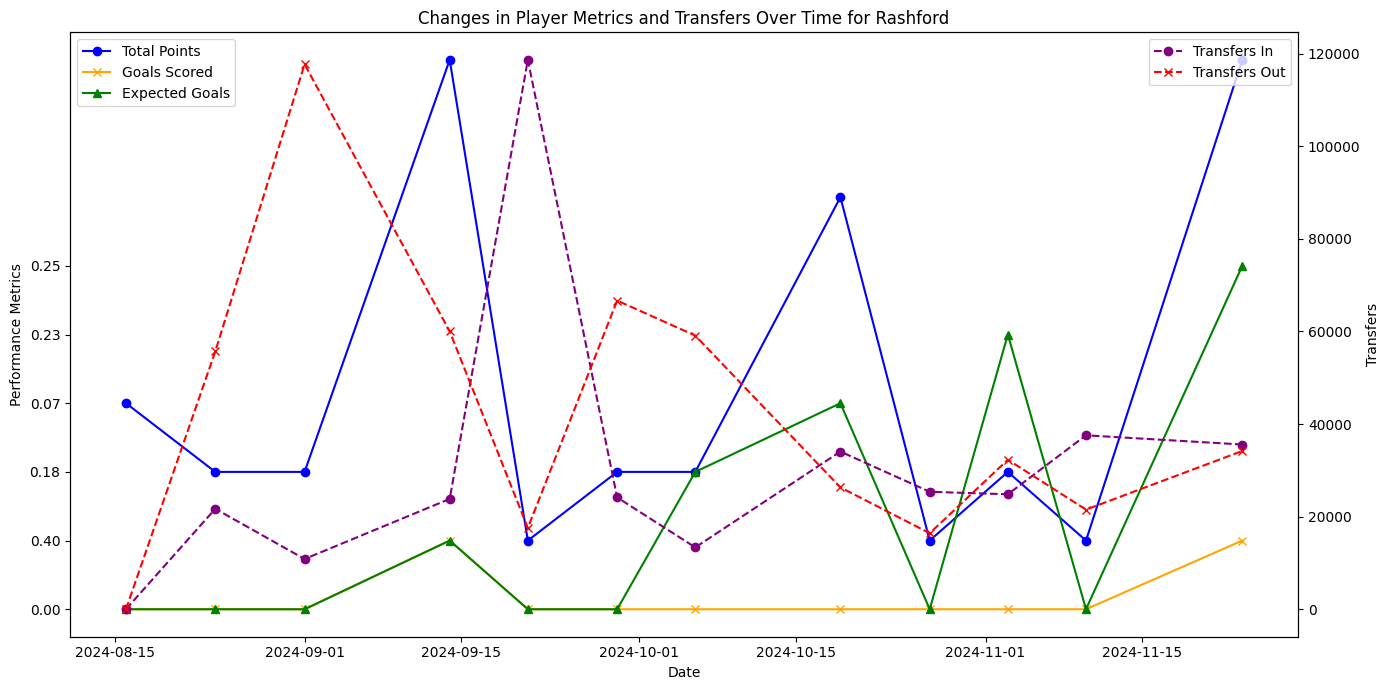

In [55]:
#Player Efficency 

import matplotlib.pyplot as plt
import pandas as pd

# Set the date as the index (optional, but useful for time series data)
rashford_data.set_index('date', inplace=True)

# Create the figure and the first axis for performance metrics
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot total_points, goals_scored, and expected_goals on the first axis
ax1.plot(rashford_data.index, rashford_data['total_points'], label='Total Points', color='blue', marker='o')
ax1.plot(rashford_data.index, rashford_data['goals_scored'], label='Goals Scored', color='orange', marker='x')
ax1.plot(rashford_data.index, rashford_data['expected_goals'], label='Expected Goals', color='green', marker='^')

# Adding labels for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Performance Metrics')
ax1.set_title('Changes in Player Metrics and Transfers Over Time for Rashford')

# Creating a second axis for transfers data (transfers_in and transfers_out)
ax2 = ax1.twinx()
ax2.plot(rashford_data.index, rashford_data['transfers_in'], label='Transfers In', color='purple', marker='o', linestyle='--')
ax2.plot(rashford_data.index, rashford_data['transfers_out'], label='Transfers Out', color='red', marker='x', linestyle='--')

# Adding labels for the second y-axis
ax2.set_ylabel('Transfers')

# Adding legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


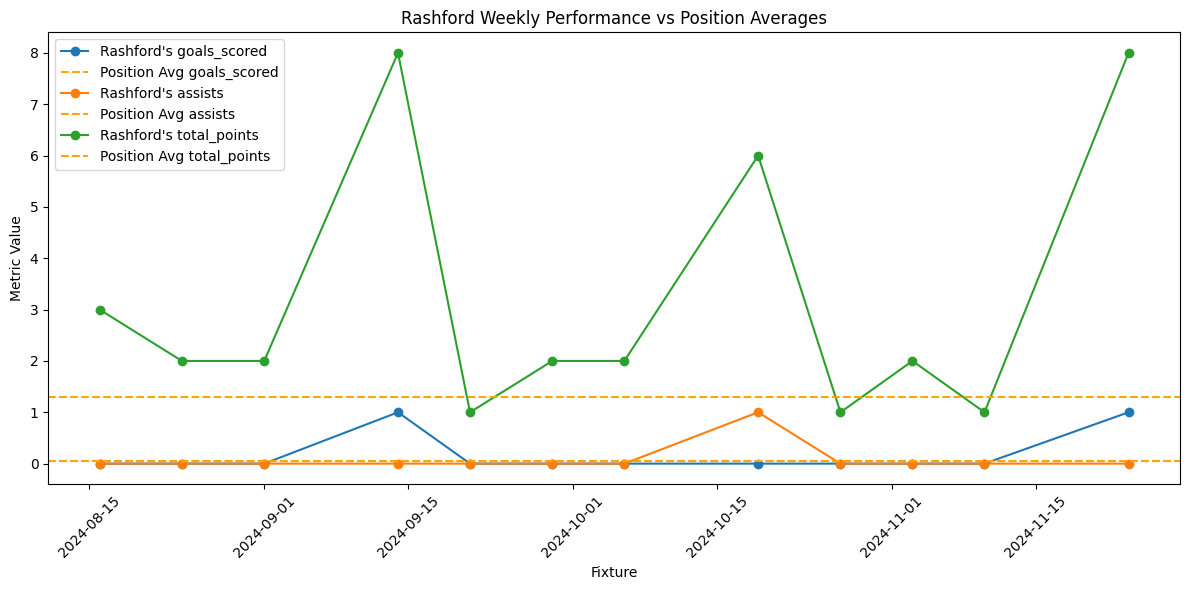

In [88]:
import matplotlib.pyplot as plt

# Make sure 'rashford_data' contains both player data and position averages
# We can extract Rashford's performance and the position averages from the dataframe.

# List of metrics to compare (choose the metrics you want to compare)
metrics_to_plot = ['goals_scored', 'assists', 'total_points']

# Create a figure
plt.figure(figsize=(12, 6))

# Loop through each metric and plot it
for metric in metrics_to_plot:
    # Plot Rashford's metric over time (fixture number or date)
    plt.plot(rashford_data['date'], rashford_data[metric], label=f"Rashford's {metric}", marker='o')

    # Plot the average metric value for his position as a horizontal line
    avg_metric = f'{metric}_avg'  # Example: 'goals_scored_avg', 'assists_avg'
    plt.axhline(y=rashford_data[avg_metric].iloc[0], color='orange', linestyle='--', label=f"Position Avg {metric}")

# Add labels and title
plt.xlabel('Fixture')
plt.ylabel('Metric Value')
plt.title('Rashford Weekly Performance vs Position Averages')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Tight layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()


#### My team points vs Best 11 points

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_cumulative_total_points(df, selected_players, best_players):
    # Filter data for the selected players and best players
    selected_data = df[df['web_name'].isin(selected_players)]
    best_data = df[df['web_name'].isin(best_players)]
    
    # Initialize lists to store cumulative points for each player
    selected_cumulative_points = []
    best_cumulative_points = []
    
    # Get unique fixtures (dates)
    fixtures = sorted(df['date'].unique())
    
    # Calculate cumulative total points for the selected players
    selected_total_points = []
    for player in selected_players:
        player_data = selected_data[selected_data['web_name'] == player]
        player_cumulative_points = []
        
        # Aggregate total points per fixture
        for fixture in fixtures:
            fixture_data = player_data[player_data['date'] == fixture]
            fixture_points = fixture_data['total_points'].sum()  # Sum points for each fixture
            if player_cumulative_points:
                cumulative_points = player_cumulative_points[-1] + fixture_points  # Add cumulative points
            else:
                cumulative_points = fixture_points  # First fixture, set to total points for that fixture
            player_cumulative_points.append(cumulative_points)
        
        selected_total_points.append(player_cumulative_points)
    
    # Calculate cumulative total points for the best players
    best_total_points = []
    for player in best_players:
        player_data = best_data[best_data['web_name'] == player]
        player_cumulative_points = []
        
        # Aggregate total points per fixture
        for fixture in fixtures:
            fixture_data = player_data[player_data['date'] == fixture]
            fixture_points = fixture_data['total_points'].sum()  # Sum points for each fixture
            if player_cumulative_points:
                cumulative_points = player_cumulative_points[-1] + fixture_points  # Add cumulative points
            else:
                cumulative_points = fixture_points  # First fixture, set to total points for that fixture
            player_cumulative_points.append(cumulative_points)
        
        best_total_points.append(player_cumulative_points)

    # Calculate the average cumulative points for both selected and best players
    selected_avg_points = np.mean(selected_total_points, axis=0)
    best_avg_points = np.mean(best_total_points, axis=0)

    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot the cumulative points for selected players and best players
    plt.plot(fixtures, selected_avg_points, label="Selected 11 Players", color='blue', linewidth=2)
    plt.plot(fixtures, best_avg_points, label="Best 11 Players", color='green', linewidth=2, linestyle='--')
    
    plt.xlabel('Fixture Date')
    plt.ylabel('Cumulative Total Points')
    plt.title('Cumulative Total Points Comparison: Selected 11 Players vs Best 11 Players')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


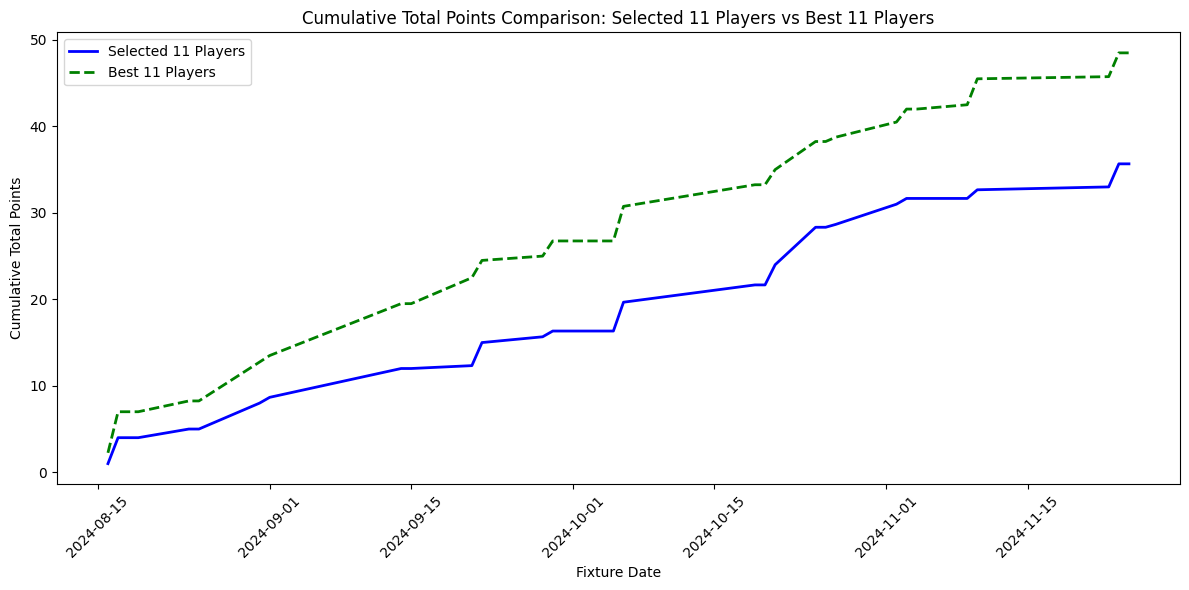

In [99]:
my_team = ['Wood', 'Salah', 'Rashford']
best_11 = ['Wood', 'Salah', 'Rashford', 'Onana']
plot_cumulative_total_points(df_combined, my_team, best_11)

#### Comparison

In [101]:
df_with_position_avg.columns

Index(['first_name', 'second_name', 'web_name', 'team_name', 'position',
       'element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'value',
       'transfers_balance', 'selected', 'transfers_in', 'transfers_out',
       'player_id', 'date', 'time', 'element_avg', 'fixture_avg',
       'opponent_team_avg', 'total_points_avg', 'team_h_score_avg',
       'team_a_score_avg', 'round_avg', 'minutes_avg', 'goals_scored_avg',
       'assists_avg', 'clean_sheets_avg', 'goals_conceded_avg',
       'own_goals_avg', 'penalties_saved_avg', 'penalties_missed_a

In [122]:
def compare_players_cost_and_percent_selected(df, player1_name, player2_name):
    """
    Compare the cost and percent selected of two players over time.

    Parameters:
        df (DataFrame): The combined DataFrame containing all player data.
        player1_name (str): The web_name of the first player.
        player2_name (str): The web_name of the second player.
    """
    # Filter data for the two players
    player1_data = df[df['web_name'] == player1_name]
    player2_data = df[df['web_name'] == player2_name]
    
    # Calculate percent selected for both players
    player1_data['percent_selected'] = (player1_data['selected'] / 7628968) * 100
    player2_data['percent_selected'] = (player2_data['selected'] / 7628968) * 100
    
    # Plot cost for both players
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    ax1.plot(player1_data['date'], player1_data['value'], label=f"{player1_name} Cost (in M)", color='blue', linewidth=2)
    ax1.plot(player2_data['date'], player2_data['value'], label=f"{player2_name} Cost (in M)", color='green', linewidth=2)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cost (in M)')
    ax1.legend(loc='upper left')
    
    # Add secondary y-axis for percent selected
    ax2 = ax1.twinx()
    ax2.plot(player1_data['date'], player1_data['percent_selected'], label=f"{player1_name} % Selected", color='blue', linestyle='--')
    ax2.plot(player2_data['date'], player2_data['percent_selected'], label=f"{player2_name} % Selected", color='green', linestyle='--')
    ax2.set_ylabel('% Selected')
    ax2.legend(loc='upper right')
    
    # Add title
    plt.title(f"Comparison of {player1_name} and {player2_name}: Cost and % Selected Over Time")
    
    # Display the plot
    plt.show()


C:\Users\Jacob\AppData\Local\Temp\ipykernel_9480\241580352.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player1_data['percent_selected'] = (player1_data['selected'] / 7628968) * 100
C:\Users\Jacob\AppData\Local\Temp\ipykernel_9480\241580352.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player2_data['percent_selected'] = (player2_data['selected'] / 7628968) * 100


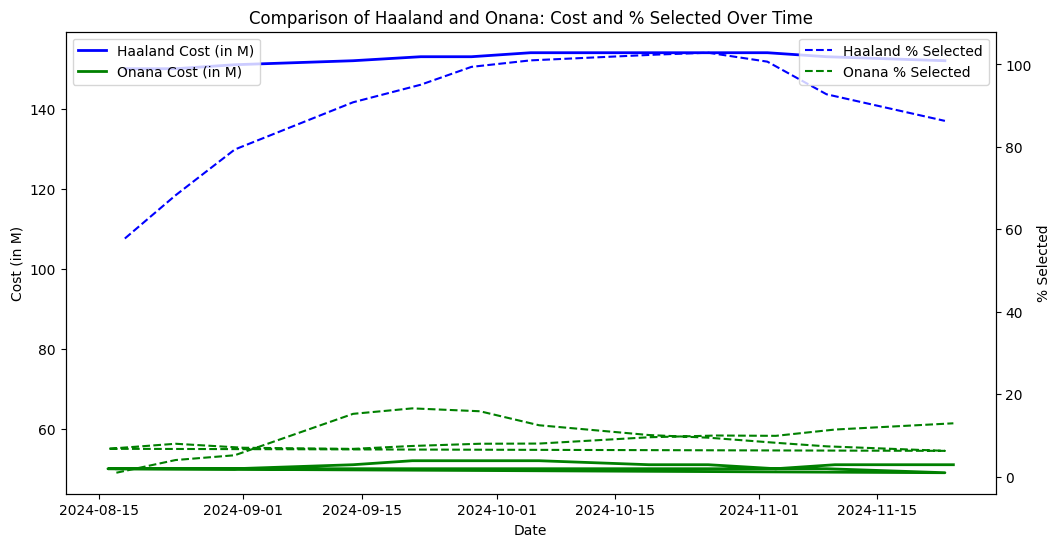

In [129]:
compare_players_cost_and_percent_selected(df_with_position_avg, 'Haaland', 'Onana')

In [121]:
rashford_data['selected'].numeric/7628968

AttributeError: 'Series' object has no attribute 'numeric'